In [11]:
import numpy as np
import pandas as pd

In [12]:
calls= pd.read_csv('callsf0d4f5a.csv')
calls.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


In [13]:
sentiment= pd.read_csv('sentiment_statisticscc1e57a.csv')
sentiment.head()

,call_id,agent_id,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,963118,neutral,angry,-0.04,0.39
1,1122072124,519057,calm,neutral,0.02,0.35
2,6834291559,158319,neutral,polite,-0.13,0.32
3,2266439882,488324,neutral,frustrated,-0.20,0.20
4,1211603231,721730,neutral,polite,-0.05,0.35


In [14]:
reasons= pd.read_csv('reason18315ff.csv')
reasons.head()

,call_id,primary_call_reason
0,4667960400,Voluntary Cancel
1,1122072124,Booking
2,6834291559,IRROPS
3,2266439882,Upgrade
4,1211603231,Seating


In [15]:
customer= pd.read_csv('customers2afd6ea.csv')
customer.head()

,customer_id,customer_name,elite_level_code
0,2033123310,Matthew Foster,4.0
1,8186702651,Tammy Walters,NaN
2,2416856629,Jeffery Dixon,NaN
3,1154544516,David Wilkins,2.0
4,5214456437,Elizabeth Daniels,0.0


In [16]:
# How are AHT and AST Calculated?
# AHT (Average Handle Time):
# Time from when the agent picks up the call to when they hang up.

# AST (Average Speed to Answer):
# Time spent by the customer in queue till the agent answers the call
# Formula:
# AST = Total Waiting Time / Total Number of Calls

# Deliverables:
# Long average handle time (AHT) affects both efficiency and customer satisfaction. Explore the factors 
# contributing to extended call durations, such as agent performance, call types, and sentiment. Identify
# key drivers of long AHT and AST, especially during high volume call periods. Additionally, could 
# you quantify the percentage difference between the average handling time for the most frequent and
# least frequent call reasons?

In [17]:
reasons.sample(8)

,call_id,primary_call_reason
7350,1693743077,Check-In
4500,2920927711,Baggage
60353,571495242,Upgrade
20734,9531617519,Mileage Plus
39076,3809125795,Communications
41167,6481398895,Baggage
30318,7843855926,Products and Services
39358,7350713204,Mileage Plus


In [18]:
reasons['primary_call_reason'].value_counts()

primary_call_reason
IRROPS                     13057
Voluntary Change           10291
Seating                     6223
Mileage Plus                5487
Post-Flight                 3869
Communications              3779
Products and Services       2792
Upgrade                     2682
Baggage                     2616
Booking                     2589
Checkout                    1840
Check-In                    1490
Voluntary Cancel            1304
Digital Support              996
ETC                          930
Traveler Updates             772
Schedule Change              707
Other Topics                 568
Products & Services          476
Disability                   394
Check In                     385
Post Flight                  373
Voluntary  Cancel            278
IRROPS                       254
Other  Topics                234
Voluntary Change             208
Voluntary   Change           200
Voluntary  Change            149
Seating                      142
Digital   Support      

In [19]:
calls.columns 

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript'],
      dtype='object')

In [20]:
 reasons.columns

Index(['call_id', 'primary_call_reason'], dtype='object')

In [21]:
sentiment.columns

Index(['call_id', 'agent_id', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average'],
      dtype='object')

In [22]:
customer.columns

Index(['customer_id', 'customer_name', 'elite_level_code'], dtype='object')

# Preprocessing Missing Values:

In [23]:
print("Before preprocessing 'reasons' dataset missing values:")
print(reasons.isnull().sum())                           

Before preprocessing 'reasons' dataset missing values:
call_id                0
primary_call_reason    0
dtype: int64


In [24]:
print("Before preprocessing 'sentiment' dataset missing values:")
print(sentiment.isnull().sum())

Before preprocessing 'sentiment' dataset missing values:
call_id                      0
agent_id                     0
agent_tone                 217
customer_tone                0
average_sentiment          109
silence_percent_average      0
dtype: int64


In [25]:
print("After preprocessing 'sentiment' dataset missing values:")
sentiment['agent_tone'].fillna('neutral', inplace=True)
sentiment['average_sentiment'].fillna(sentiment['average_sentiment'].mean(), inplace=True)
print(sentiment.isnull().sum())

After preprocessing 'sentiment' dataset missing values:
call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [26]:
print("Before preprocessing 'customer' dataset missing values:")
print(customer.isnull().sum())

Before preprocessing 'customer' dataset missing values:
customer_id             0
customer_name           0
elite_level_code    25767
dtype: int64


In [27]:
print("After preprocessing 'customer' dataset missing values:")
customer['elite_level_code'].fillna(0 ,inplace=True)
print(sentiment.isnull().sum())

After preprocessing 'customer' dataset missing values:
call_id                    0
agent_id                   0
agent_tone                 0
customer_tone              0
average_sentiment          0
silence_percent_average    0
dtype: int64


In [28]:
# Explore the factors 
# contributing to extended call durations, such as agent performance, call types, and sentiment.

# Data Preprocessing

In [29]:
call_reasons= calls.merge(reasons, on='call_id', how='left')
call_reasons.columns

Index(['call_id', 'customer_id', 'agent_id', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason'],
      dtype='object')

In [30]:
call_sent= call_reasons.merge(sentiment, on= 'call_id', how='left')
call_sent.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average'],
      dtype='object')

In [31]:
full_data = call_sent.merge(customer, on='customer_id', how='left')
full_data.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'customer_name',
       'elite_level_code'],
      dtype='object')

In [32]:
#Calculating AHT in minutes :
full_data['call_start_datetime'] = pd.to_datetime(full_data['call_start_datetime'])
full_data['call_end_datetime'] =  pd.to_datetime(full_data['call_end_datetime'])

In [33]:
full_data['AHT']= (full_data['call_end_datetime']-full_data['call_start_datetime'])
full_data.sample(5)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,AHT
61063,2085525438,8806579511,734708,2024-08-26 11:40:00,8/26/2024 11:44,2024-08-26 11:55:00,\n\nAgent: Thank you for calling United Airlin...,Products and Services,734708,calm,neutral,0.070000,0.27,Robert Harris,0.0,0 days 00:15:00
36073,6286732205,7880889344,901589,2024-08-17 09:30:00,8/17/2024 9:37,2024-08-17 09:49:00,\n\nAgent: Thank you for calling United Airlin...,NaN,901589,neutral,angry,-0.110000,0.58,Curtis Hughes,0.0,0 days 00:19:00
10374,5060348952,470141233,319947,2024-08-04 14:38:00,8/4/2024 14:42,2024-08-04 14:50:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,319947,calm,angry,0.270000,0.79,Jessica Porter,0.0,0 days 00:12:00
15886,4086529323,3828420226,882260,2024-08-07 16:59:00,8/7/2024 17:02,2024-08-07 17:13:00,\n\nAgent: Thank you for calling United Airlin...,Booking,882260,neutral,neutral,-0.030000,0.34,Krista Jenkins,1.0,0 days 00:14:00
68392,5371184262,7957997569,968346,2024-08-31 10:02:00,8/31/2024 10:12,2024-08-31 10:17:00,\n\nAgent: Thank you for calling United Airlin...,Seating,968346,neutral,polite,-0.033519,0.56,Michelle Arroyo,0.0,0 days 00:15:00


In [34]:
full_data = pd.get_dummies(full_data, columns=['primary_call_reason', 'agent_tone', 'customer_tone', 'elite_level_code'], drop_first=True)

In [35]:
type(full_data['AHT'])

pandas.core.series.Series

In [45]:
full_data.head()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_id_y,average_sentiment,silence_percent_average,...,elite_level_code_3.0,elite_level_code_4.0,elite_level_code_5.0,call_start_hour,call_start_minute,call_end_hour,call_end_minute,agent_assigned_hour,agent_assigned_minute,AHT_seconds
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,963118,-0.04,0.39,...,0,1,0,23,56,0,34,0,3,2280.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,519057,0.02,0.35,...,0,0,0,0,3,0,18,0,6,900.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,158319,-0.13,0.32,...,0,0,0,23,59,0,26,0,7,1620.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,488324,-0.20,0.20,...,0,0,0,0,5,0,17,0,10,720.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,721730,-0.05,0.35,...,0,0,0,0,4,0,23,0,14,1140.0


In [37]:
# Convert all boolean columns to integers in the entire DataFrame
full_data[full_data.select_dtypes(include=['bool']).columns] = full_data.select_dtypes(include=['bool']).astype(int)

In [46]:
full_data.head(3)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_id_y,average_sentiment,silence_percent_average,...,elite_level_code_3.0,elite_level_code_4.0,elite_level_code_5.0,call_start_hour,call_start_minute,call_end_hour,call_end_minute,agent_assigned_hour,agent_assigned_minute,AHT_seconds
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,963118,-0.04,0.39,...,0,1,0,23,56,0,34,0,3,2280.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,519057,0.02,0.35,...,0,0,0,0,3,0,18,0,6,900.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,158319,-0.13,0.32,...,0,0,0,23,59,0,26,0,7,1620.0


In [89]:
# Extracting datetime components
full_data['call_start_hour'] = full_data['call_start_datetime'].dt.hour
full_data['call_start_minute'] = full_data['call_start_datetime'].dt.minute


full_data['call_end_hour'] = full_data['call_end_datetime'].dt.hour
full_data['call_end_minute'] = full_data['call_end_datetime'].dt.minute

In [48]:
#Now agent_assigned column is not in right format so we will first convert it into datetime format 
full_data['agent_assigned_datetime'] = pd.to_datetime(full_data['agent_assigned_datetime'], errors='coerce')

In [49]:
# Same extraction for other datetime columns
full_data['agent_assigned_hour'] = full_data['agent_assigned_datetime'].dt.hour
full_data['agent_assigned_minute'] = full_data['agent_assigned_datetime'].dt.minute

In [50]:
# Assuming full_data['AHT'] is in timedelta64[ns]
# Convert AHT (timedelta) to total seconds and create a new column
full_data['AHT_seconds'] = full_data['AHT'].dt.total_seconds()

In [51]:
full_data.head(2)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,agent_id_y,average_sentiment,silence_percent_average,...,elite_level_code_3.0,elite_level_code_4.0,elite_level_code_5.0,call_start_hour,call_start_minute,call_end_hour,call_end_minute,agent_assigned_hour,agent_assigned_minute,AHT_seconds
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,963118,-0.04,0.39,...,0,1,0,23,56,0,34,0,3,2280.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,519057,0.02,0.35,...,0,0,0,0,3,0,18,0,6,900.0


In [67]:
# Convert AHT (timedelta) to total seconds and create a new column
full_data['AHT_seconds'] = full_data['AHT'].dt.total_seconds()

In [156]:
from sklearn.model_selection import train_test_split
x= full_data.drop(columns=['AHT_seconds', 'call_id', 'customer_id', 'agent_id_x','agent_id_y','call_end_minute','call_start_hour','call_start_minute','agent_assigned_hour','agent_assigned_minute','customer_name','call_end_hour','call_start_datetime','agent_assigned_datetime','call_end_datetime','call_transcript','AHT'])
y= full_data['AHT_seconds']

In [157]:
x.sample(9)

,average_sentiment,silence_percent_average,primary_call_reason_Baggage,primary_call_reason_Baggage,primary_call_reason_Booking,primary_call_reason_Booking,primary_call_reason_Check In,primary_call_reason_Check-In,primary_call_reason_Check-In,primary_call_reason_Checkout,...,agent_tone_polite,customer_tone_calm,customer_tone_frustrated,customer_tone_neutral,customer_tone_polite,elite_level_code_1.0,elite_level_code_2.0,elite_level_code_3.0,elite_level_code_4.0,elite_level_code_5.0
21806,-0.02,0.44,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3081,-0.09,0.21,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57474,-0.07,0.21,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
44452,-0.12,0.22,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47470,0.04,0.31,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
54156,0.17,0.38,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21987,0.06,0.48,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
39750,0.00,0.13,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
21572,-0.10,0.16,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [158]:
x_train, x_test, y_train, y_test= train_test_split(x,y, random_state=42, test_size= 0.2)
print(x.shape)
print(x_train.shape, x_test.shape)

(71810, 68)
(57448, 68) (14362, 68)


In [159]:
full_data.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'agent_id_y', 'average_sentiment', 'silence_percent_average',
       'customer_name', 'AHT', 'primary_call_reason_Baggage',
       'primary_call_reason_Baggage  ', 'primary_call_reason_Booking',
       'primary_call_reason_Booking  ', 'primary_call_reason_Check In',
       'primary_call_reason_Check-In', 'primary_call_reason_Check-In  ',
       'primary_call_reason_Checkout', 'primary_call_reason_Checkout  ',
       'primary_call_reason_Communications',
       'primary_call_reason_Communications  ',
       'primary_call_reason_Digital   Support',
       'primary_call_reason_Digital  Support',
       'primary_call_reason_Digital Support',
       'primary_call_reason_Digital Support  ',
       'primary_call_reason_Disability', 'primary_call_reason_Disability  ',
       'primary_call_reason_ETC', 'primary_call_reason_ETC  ',
       'primary

# Model making

In [160]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

In [161]:
model = CatBoostRegressor(verbose=0, random_seed=42)
#Train the model
model.fit(x_train, y_train)

In [163]:
# Make predictions
y_pred = model.predict(x_test)

# Evaluate the model using MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
# Print evaluation metrics
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"{r2=}")

MAE: 424.0942112089076
RMSE: 675.3452068878856
r2=0.2697362487022622


In [164]:
# Get feature importances
feature_importances = model.get_feature_importance()
feature_names = x_train.columns

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the most important feature
print("\nMost important feature to predict AHT_seconds:")
print(feature_importance_df)


Most important feature to predict AHT_seconds:
                                      Feature  Importance
1                     silence_percent_average   37.201021
0                           average_sentiment   22.656718
9                primary_call_reason_Checkout    4.997204
57                         agent_tone_neutral    4.510837
31            primary_call_reason_Post-Flight    4.036672
..                                        ...         ...
52     primary_call_reason_Voluntary Cancel      0.002866
16      primary_call_reason_Digital Support      0.002587
43     primary_call_reason_Traveler Updates      0.001406
18           primary_call_reason_Disability      0.000622
45  primary_call_reason_Unaccompanied Minor      0.000000

[68 rows x 2 columns]


In [165]:
print(feature_importance_df.max())

Feature       silence_percent_average
Importance                  37.201021
dtype: object


In [166]:
important_features = feature_importance_df[feature_importance_df['Importance'].abs() > 0]
print(important_features)

                                   Feature  Importance
1                  silence_percent_average   37.201021
0                        average_sentiment   22.656718
9             primary_call_reason_Checkout    4.997204
57                      agent_tone_neutral    4.510837
31         primary_call_reason_Post-Flight    4.036672
..                                     ...         ...
58                       agent_tone_polite    0.004595
52  primary_call_reason_Voluntary Cancel      0.002866
16   primary_call_reason_Digital Support      0.002587
43  primary_call_reason_Traveler Updates      0.001406
18        primary_call_reason_Disability      0.000622

[67 rows x 2 columns]


                                 Feature  Importance
1                silence_percent_average   37.201021
0                      average_sentiment   22.656718
9           primary_call_reason_Checkout    4.997204
57                    agent_tone_neutral    4.510837
31       primary_call_reason_Post-Flight    4.036672
25      primary_call_reason_Mileage Plus    3.765599
4            primary_call_reason_Booking    2.608639
19               primary_call_reason_ETC    1.427481
59                    customer_tone_calm    1.189073
53  primary_call_reason_Voluntary Change    0.951253


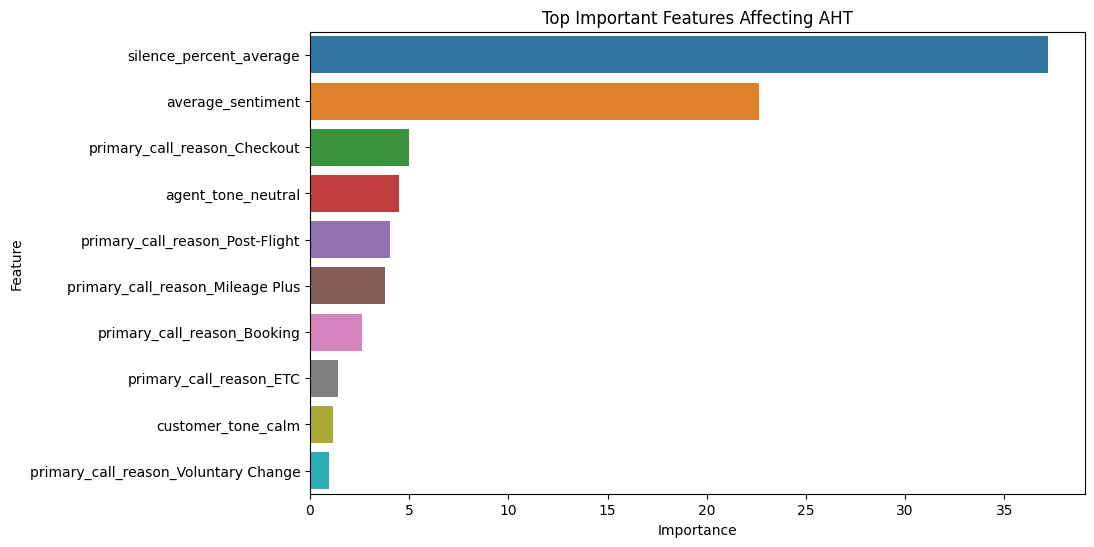

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

# Display the top 10 most important features
top_n = 10 
print(feature_importance_df.head(top_n))


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(top_n))
plt.title('Top Important Features Affecting AHT')
plt.show()

#  Heat Map (Co-relation between features and AHT )

In [168]:
call_reasons1= calls.merge(reasons, on='call_id', how='left')
call_sent1= call_reasons1.merge(sentiment, on= 'call_id', how='left')
new_data= call_sent1.merge(customer, on='customer_id', how='left')

In [169]:
new_data['call_start_datetime']= pd.to_datetime(new_data['call_start_datetime'])
new_data['call_end_datetime']= pd.to_datetime(new_data['call_end_datetime'])

In [170]:
new_data['AHT_seconds']= (new_data['call_end_datetime']- new_data['call_start_datetime']).dt.total_seconds()

In [171]:
new_data.head(3)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,AHT_seconds
0,4667960400,2033123310,963118,2024-07-31 23:56:00,8/1/2024 0:03,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0,2280.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,8/1/2024 0:06,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,0.0,900.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,8/1/2024 0:07,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,IRROPS,158319,neutral,polite,-0.13,0.32,Jeffery Dixon,0.0,1620.0


In [172]:
relevant_columns = [
    'agent_tone',
    'primary_call_reason',
    'customer_tone',
    'average_sentiment',
    'silence_percent_average',
    'elite_level_code',
    'AHT_seconds' 
]


heatmap_data = new_data[relevant_columns]            # Trying to show how the factors present in relevant columns affects AHT:


heatmap_data = pd.get_dummies(heatmap_data, drop_first=True)            # Convert categorical columns to numerical:

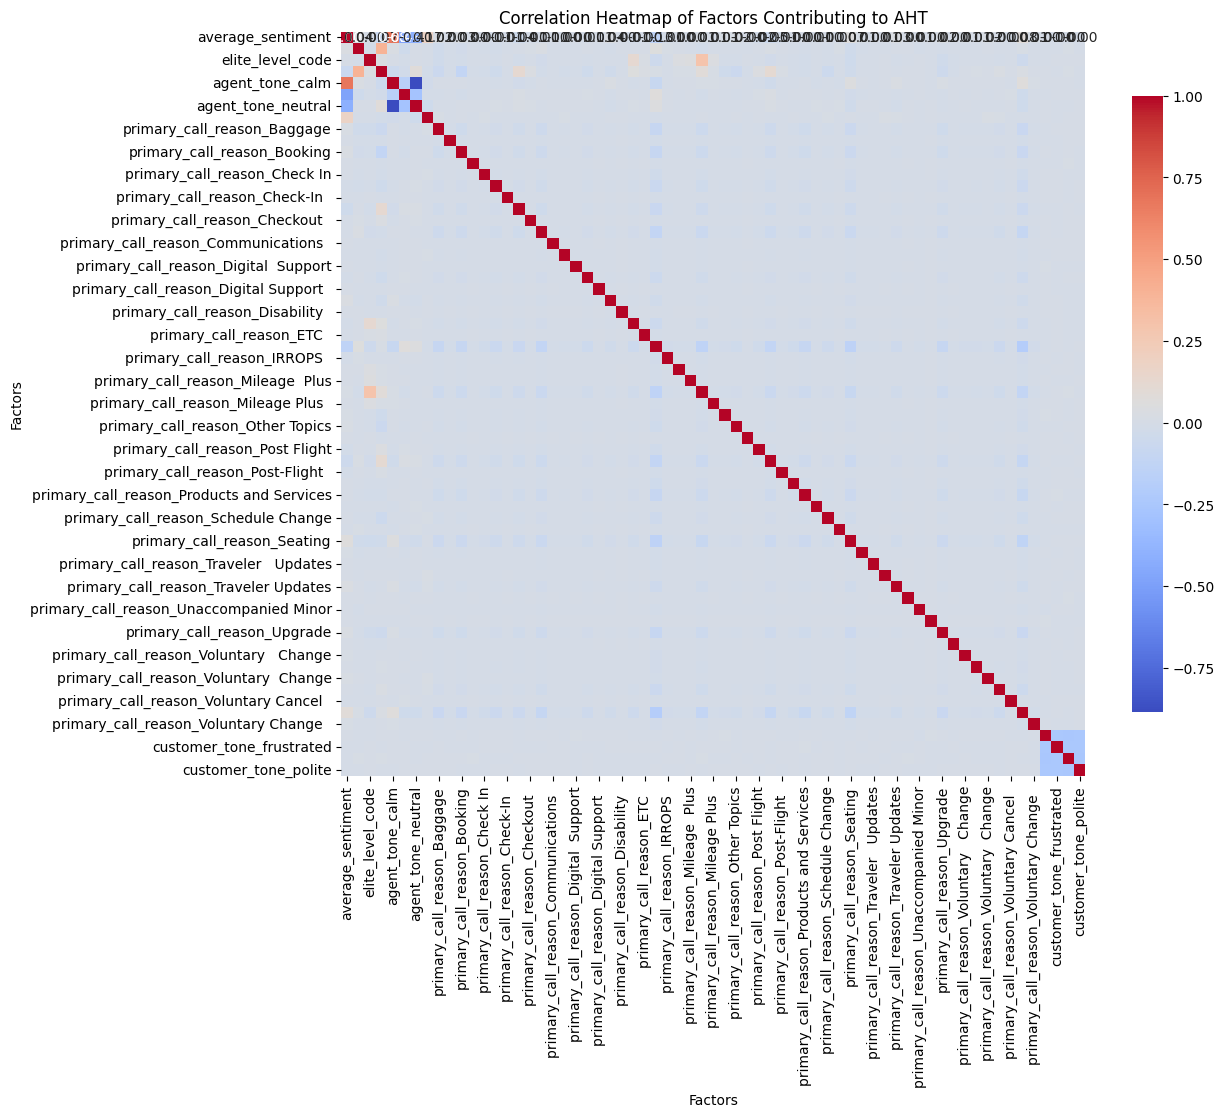

In [173]:
correlation_matrix = heatmap_data.corr()
plt.figure(figsize=(12, 10))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

plt.title('Correlation Heatmap of Factors Contributing to AHT')
plt.xlabel('Factors')
plt.ylabel('Factors')

plt.show()

In [213]:
#Dynamic Visualization using plotly
import plotly.express as px

relevant_columns = [
    'agent_tone',
    'primary_call_reason',
    'customer_tone',
    'average_sentiment',
    'silence_percent_average',
    'elite_level_code',
    'AHT_seconds'     
]

In [214]:
heatmap_data = new_data[relevant_columns]


heatmap_data = pd.get_dummies(heatmap_data, drop_first=True)                   # Categorical encoding:

correlation_matrix = heatmap_data.corr()


correlation_matrix = correlation_matrix.reset_index().melt(id_vars='index')     # Reset index to create a tidy format for Plotly

correlation_matrix.columns = ['Feature1', 'Feature2', 'Correlation']   # Rename the columns for clarity

# Percentage difference between the average handling time for the most frequent and least frequent call reasons!!

In [216]:
new_data.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'customer_name',
       'elite_level_code', 'AHT_seconds', 'AST', 'AST_seconds', 'call_date'],
      dtype='object')

In [217]:
# Removing Outliers
Q1= new_data['AHT_seconds'].quantile(0.25)
Q3 = new_data['AHT_seconds'].quantile(0.75)
IQR = (Q3-Q1)

In [218]:
upper_limit = (Q3+1.5*IQR)
lower_limit = (Q1-1.5*IQR)
print("upper_limit: ", upper_limit)
print("lower_limit: ", lower_limit)

upper_limit:  2310.0
lower_limit:  -330.0


In [219]:
filtered_data= new_data[(new_data['AHT_seconds']<= upper_limit) & (new_data['AHT_seconds'] >= lower_limit)]

<Axes: >

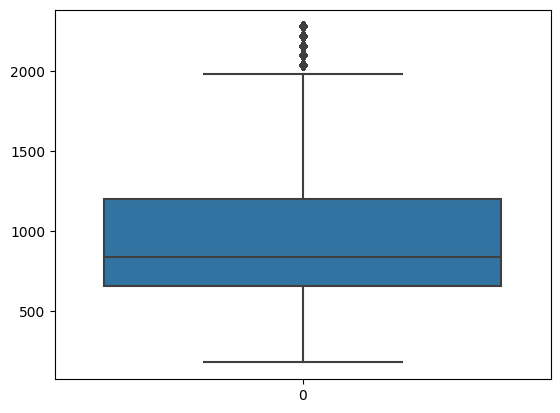

In [220]:
sns.boxplot( filtered_data['AHT_seconds'])

In [221]:
aht_reason= filtered_data.groupby('primary_call_reason')['AHT_seconds'].mean().reset_index()
# Here i calculated average AHT of each reason
aht_reason.sample(5)

,primary_call_reason,AHT_seconds
49,Voluntary Change,1106.619718
2,Baggage,830.551181
50,Voluntary Cancel,1031.387234
51,Voluntary Cancel,913.636364
35,Schedule Change,624.669604


In [222]:
frequency_by_reason = new_data['primary_call_reason'].value_counts().reset_index()
frequency_by_reason.columns = ['primary_call_reason', 'Frequency']

In [223]:
frequency_by_reason.head()

,primary_call_reason,Frequency
0,IRROPS,13057
1,Voluntary Change,10291
2,Seating,6223
3,Mileage Plus,5487
4,Post-Flight,3869


In [224]:
#Now I have calculate most frequent AHT call reasons

merged_data = pd.merge(aht_reason, frequency_by_reason, on='primary_call_reason')
merged_data = pd.merge(aht_reason, frequency_by_reason, on='primary_call_reason')
sorted_data = merged_data.sort_values(by='Frequency', ascending=False)
sorted_data.head()

,primary_call_reason,AHT_seconds,Frequency
20,IRROPS,967.441358,13057
52,Voluntary Change,1063.379005,10291
37,Seating,981.832643,6223
24,Mileage Plus,1061.031531,5487
30,Post-Flight,1159.373098,3869


In [225]:
most_frequent = merged_data.loc[merged_data['Frequency'].idxmax()]           #Identify the most and least frequent call reasons
least_frequent = merged_data.loc[merged_data['Frequency'].idxmin()]

In [226]:
most_frequent

primary_call_reason        IRROPS
AHT_seconds            967.441358
Frequency                   13057
Name: 20, dtype: object

In [227]:
least_frequent

primary_call_reason    Unaccompanied Minor  
AHT_seconds                            900.0
Frequency                                  1
Name: 44, dtype: object

In [228]:
most_frequent_aht = most_frequent['AHT_seconds']
least_frequent_aht = least_frequent['AHT_seconds']

percentage_difference = ((most_frequent_aht - least_frequent_aht) / least_frequent_aht) * 100

In [229]:
print(f'Most Frequent Call Reason:- {most_frequent["primary_call_reason"]} | Average AHT:- {most_frequent_aht} seconds')
print(f'Least Frequent Call Reason:- {least_frequent["primary_call_reason"]} | Average AHT:- {least_frequent_aht} seconds')
print(f'Percentage Difference in AHT:- {percentage_difference:.2f}%')


Most Frequent Call Reason:- IRROPS | Average AHT:- 967.4413575112294 seconds
Least Frequent Call Reason:- Unaccompanied Minor   | Average AHT:- 900.0 seconds
Percentage Difference in AHT:- 7.49%


In [230]:
new_data.columns

Index(['call_id', 'customer_id', 'agent_id_x', 'call_start_datetime',
       'agent_assigned_datetime', 'call_end_datetime', 'call_transcript',
       'primary_call_reason', 'agent_id_y', 'agent_tone', 'customer_tone',
       'average_sentiment', 'silence_percent_average', 'customer_name',
       'elite_level_code', 'AHT_seconds', 'AST', 'AST_seconds', 'call_date'],
      dtype='object')

# Key drivers of long AHT and AST, especially during high volume call periods

In [231]:
#AST calculation:

In [232]:
new_data['call_start_datetime']= pd.to_datetime(new_data['call_start_datetime'])
new_data['agent_assigned_datetime'] = pd.to_datetime(new_data['agent_assigned_datetime'])

In [233]:
new_data['AST']= (new_data['agent_assigned_datetime']- new_data['call_start_datetime'])
new_data.head(1)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,AHT_seconds,AST,AST_seconds,call_date
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0,2280.0,0 days 00:07:00,420.0,2024-07-31


In [234]:
new_data['AST_seconds'] = new_data['AST'].dt.total_seconds()                #Converting AST into seconds for analysis
new_data.head(2)

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,customer_name,elite_level_code,AHT_seconds,AST,AST_seconds,call_date
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,Matthew Foster,4.0,2280.0,0 days 00:07:00,420.0,2024-07-31
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,Booking,519057,calm,neutral,0.02,0.35,Tammy Walters,0.0,900.0,0 days 00:03:00,180.0,2024-08-01


In [235]:
new_data['call_date']= new_data['call_start_datetime'].dt.date

In [236]:
call_counts= new_data.groupby(new_data['call_date']).size().reset_index(name='call_count')
#Call counts per day

In [237]:
# Setting up a  threshold for high-volume (you can adjust this based on the data)
high_volume_threshold = call_counts['call_count'].quantile(0.90)                           # Top 10% of high-volume days

In [238]:
high_volume_days = call_counts[call_counts['call_count'] >= high_volume_threshold]['call_date']
high_volume_data = new_data[new_data['call_date'].isin(high_volume_days)]

In [239]:
high_volume_data.shape

(19315, 19)

#Visualization :

In [240]:
features = ['AHT_seconds', 'AST_seconds', 'primary_call_reason', 'agent_tone', 'customer_tone', 
            'average_sentiment', 'silence_percent_average', 'elite_level_code']

In [241]:
high_volume_data_encoded = pd.get_dummies(high_volume_data[features], drop_first=True)    #Converting Categorical into numerical

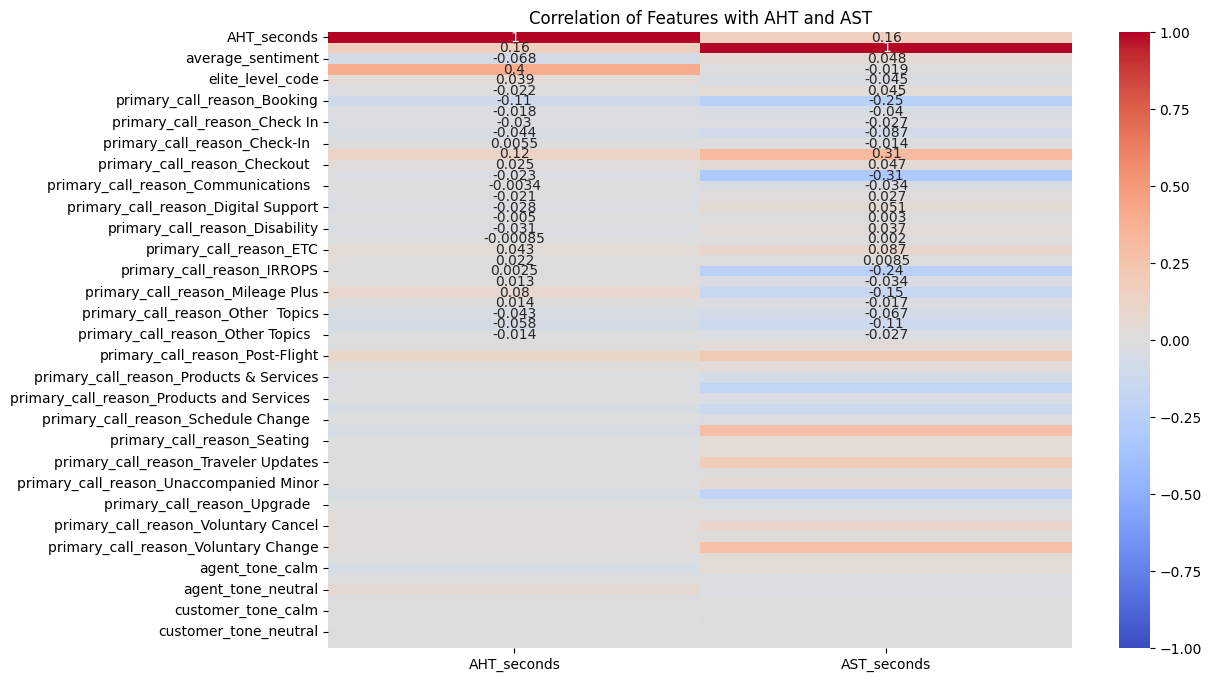

In [242]:
corr_matrix = high_volume_data_encoded.corr()

plt.figure(figsize=(12, 8))                         # Plot heatmap for AHT and AST correlations
sns.heatmap(corr_matrix[['AHT_seconds', 'AST_seconds']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Features with AHT and AST')
plt.show()

#Key factors shown by Feature Importance:

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Independent features and target variables for AHT and AST
X = high_volume_data_encoded.drop(columns=['AHT_seconds', 'AST_seconds'])
y_aht = high_volume_data_encoded['AHT_seconds']
y_ast = high_volume_data_encoded['AST_seconds']

In [244]:
X_train_aht, X_test_aht, y_train_aht, y_test_aht = train_test_split(X, y_aht, test_size=0.2, random_state=42)
X_train_ast, X_test_ast, y_train_ast, y_test_ast = train_test_split(X, y_ast, test_size=0.2, random_state=42)


rf_aht = RandomForestRegressor(n_estimators=100, random_state=42)       # Model training Random Forest Regressor for AHT
rf_aht.fit(X_train_aht, y_train_aht)

rf_ast = RandomForestRegressor(n_estimators=100, random_state=42)       # Model training Random Forest Regressor for AST   
rf_ast.fit(X_train_ast, y_train_ast)

RandomForestRegressor(random_state=42)

In [245]:
# Get feature importance for AHT
importance_aht = rf_aht.feature_importances_
feature_importance_aht = pd.DataFrame({'Feature': X.columns, 'Importance': importance_aht})
feature_importance_aht.sort_values(by='Importance', ascending=False, inplace=True)

# Get feature importance for AST
importance_ast = rf_ast.feature_importances_
feature_importance_ast = pd.DataFrame({'Feature': X.columns, 'Importance': importance_ast})
feature_importance_ast.sort_values(by='Importance', ascending=False, inplace=True)


print("Top features driving AHT:")
print(feature_importance_aht.head())

print("\nTop features driving AST:")
print(feature_importance_ast.head())

Top features driving AHT:
                    Feature  Importance
1   silence_percent_average    0.355067
0         average_sentiment    0.222487
2          elite_level_code    0.082794
52       customer_tone_calm    0.032952
54    customer_tone_neutral    0.030736

Top features driving AST:
                                 Feature  Importance
1                silence_percent_average    0.114522
35           primary_call_reason_Seating    0.106214
9           primary_call_reason_Checkout    0.098971
0                      average_sentiment    0.097081
46  primary_call_reason_Voluntary Change    0.089901


In [246]:
#Visualising feature Importance using Plotly

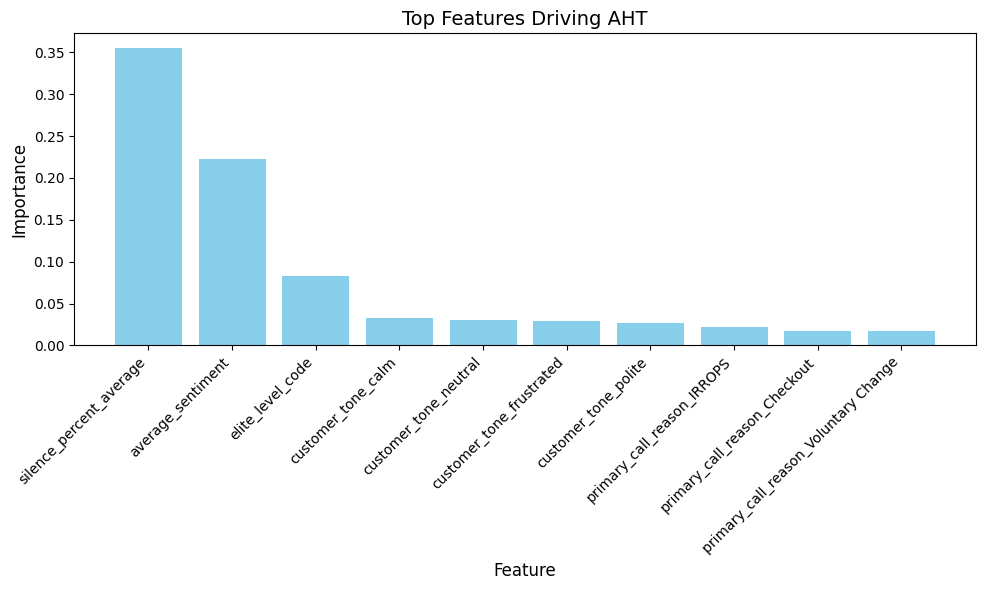

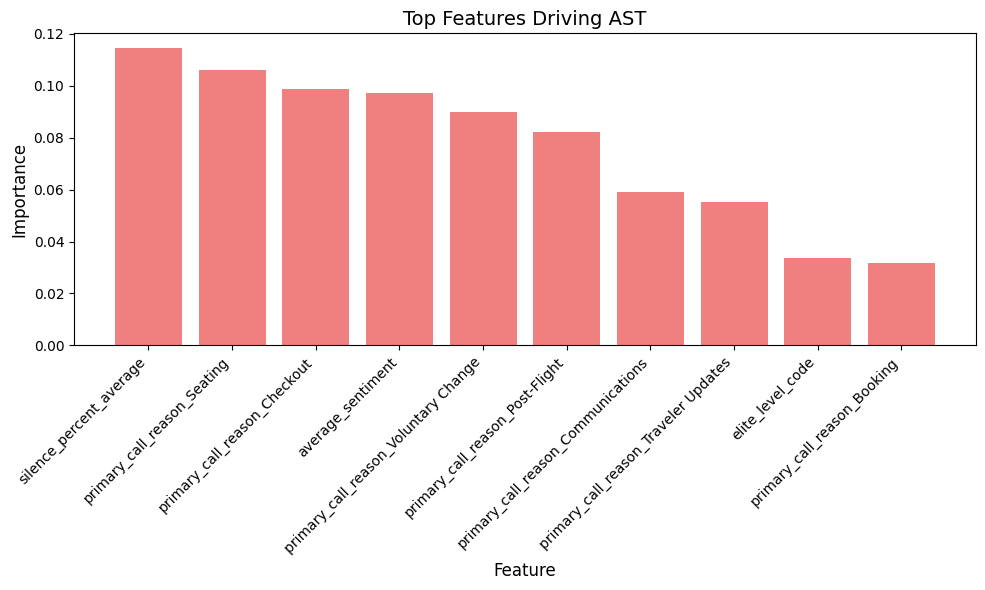

In [248]:
import matplotlib.pyplot as plt

# Visualize AHT feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_aht['Feature'][:10], feature_importance_aht['Importance'][:10], color='skyblue')
plt.title('Top Features Driving AHT', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualize AST feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_ast['Feature'][:10], feature_importance_ast['Importance'][:10], color='lightcoral')
plt.title('Top Features Driving AST', fontsize=14)
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()